In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read The Dataset

In [18]:
titanic_df = pd.read_csv("C:/Users/Admin/Downloads/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a high number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [21]:
# Convert 'Sex' to numerical values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [22]:
# Summary statistics
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

Explore Relationship between variable

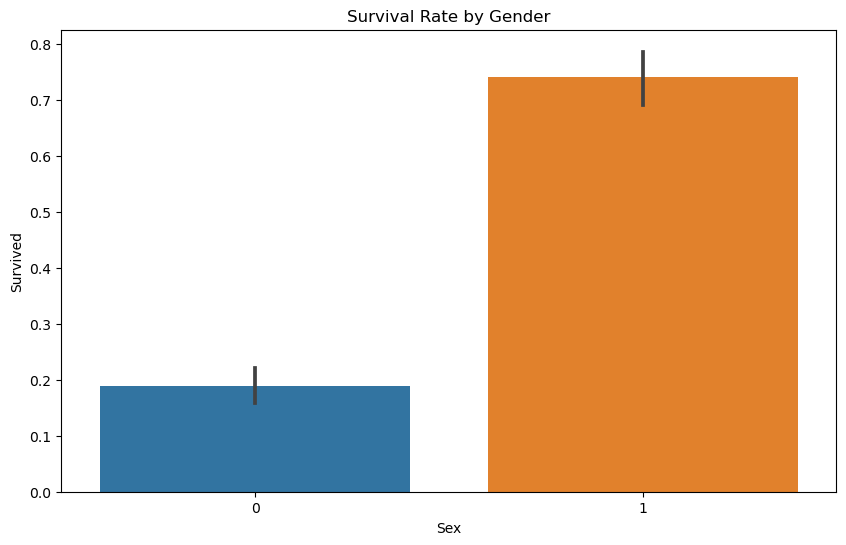

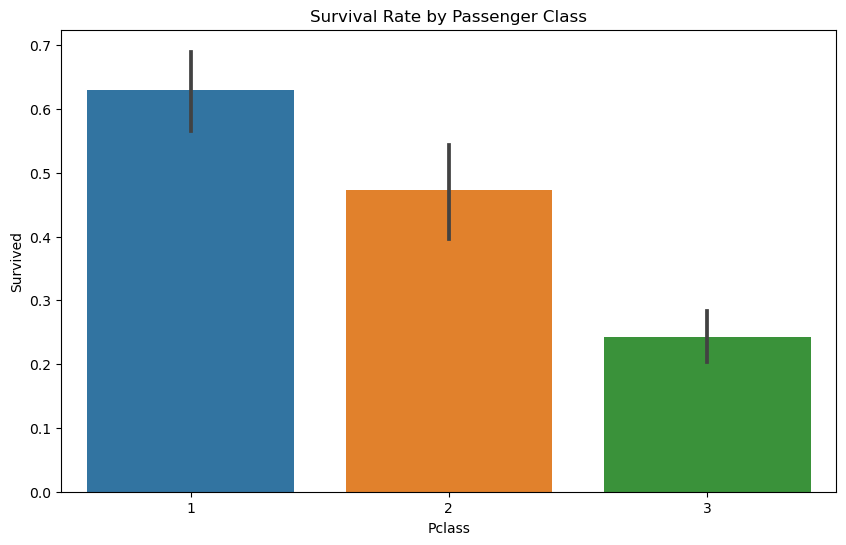

c:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

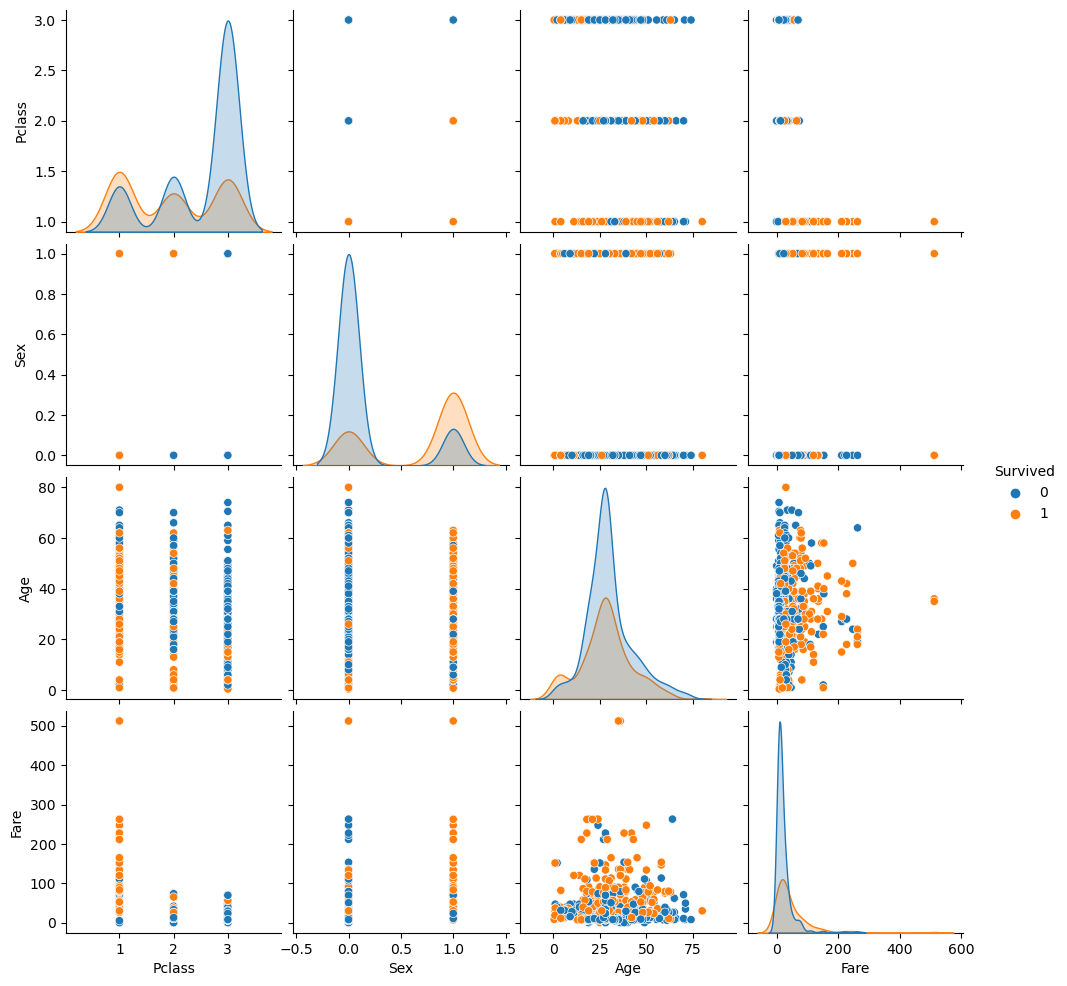

In [23]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Pairplot to see relationships between variables
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()